### Disciplina: Aprendizagem de Máquina e Mineração de Dados – UFRN
### Aluno: Pablo Durkheim e Gabriel Cruz
### Data: 08/07/2025

## Questão 1 – Algoritmo K-means

Considere os dados apresentados na tabela abaixo. Determine os **centroides dos aglomerados ("clusters")** presentes nos dados, fazendo uso do algoritmo **K-means**. Para tanto, considere os itens (a) a (c) referentes ao processo de inicialização.

### Tabela de Amostras

| Amostra | x1    | x2    | x3    |
|---------|-------|-------|-------|
| 1       | 7.82  | -4.58 | -3.97 |
| 2       | -6.68 | 3.16  | 2.71  |
| 3       | 4.36  | 2.19  | 2.09  |
| 4       | 6.72  | 0.88  | 2.80  |
| 5       | -8.64 | -3.06 | 3.50  |
| 6       | -6.87 | 0.57  | -5.45 |
| 7       | 4.47  | -2.62 | 5.76  |
| 8       | 6.73  | -2.01 | 4.18  |
| 9       | -7.71 | 2.34  | -6.33 |
| 10      | -6.91 | -0.49 | -5.68 |
| 11      | 6.18  | -2.81 | 5.82  |
| 12      | 6.72  | -0.93 | -4.04 |
| 13      | -6.25 | -0.26 | 0.56  |
| 14      | -6.94 | -1.22 | 1.13  |
| 15      | 8.09  | 0.20  | 2.25  |
| 16      | 6.81  | 0.17  | -4.15 |
| 17      | -5.19 | 4.24  | 4.04  |
| 18      | -6.38 | -1.74 | 1.43  |
| 19      | 4.08  | 1.30  | 5.33  |
| 20      | 6.27  | 0.93  | -2.78 |




---

### a) Inicialização aleatória dos centros:

Considere que existam **três clusters**, e que a **inicialização dos centros seja aleatória**.

---

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Dados da tabela
dados = [
    [7.82, -4.58, -3.97],
    [-6.68, 3.16, 2.71],
    [4.36, 2.19, 2.09],
    [6.72, 0.88, 2.80],
    [-8.64, -3.06, 3.50],
    [-6.87, 0.57, -5.45],
    [4.47, -2.62, 5.76],
    [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33],
    [-6.91, -0.49, -5.68],
    [6.18, -2.81, 5.82],
    [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56],
    [-6.94, -1.22, 1.13],
    [8.09, 0.20, 2.25],
    [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04],
    [-6.38, -1.74, 1.43],
    [4.08, 1.30, 5.33],
    [6.27, 0.93, -2.78]
]

# Convertendo para DataFrame
df = pd.DataFrame(dados, columns=["x1", "x2", "x3"])

# K-means com inicialização aleatória
kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
kmeans.fit(df)

# Centroides encontrados
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

# Exibindo os centroides
for i, centro in enumerate(centroides):
    print(f"Centroide {i+1}: x1 = {centro[0]:.2f}, x2 = {centro[1]:.2f}, x3 = {centro[2]:.2f}")


Centroide 1: x1 = 6.90, x2 = -1.10, x3 = -3.73
Centroide 2: x1 = 5.80, x2 = -0.41, x3 = 4.03
Centroide 3: x1 = -6.84, x2 = 0.39, x3 = -0.45


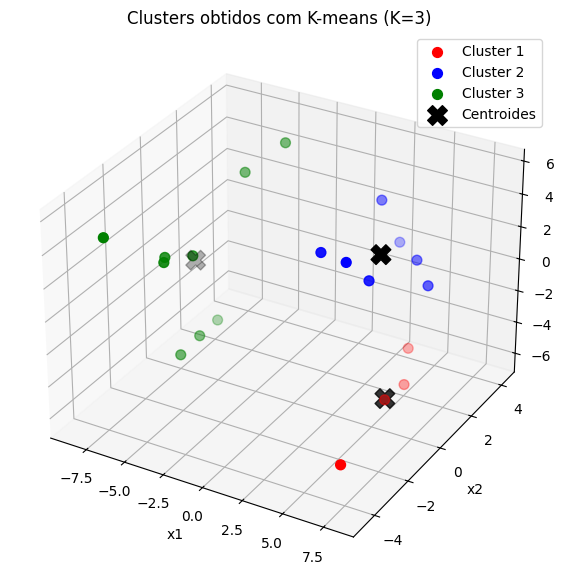

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotagem dos clusters em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Cores para cada cluster
cores = ['red', 'blue', 'green']
for i in range(3):
    pontos = df[rotulos == i]
    ax.scatter(pontos['x1'], pontos['x2'], pontos['x3'],
               c=cores[i], label=f'Cluster {i+1}', s=50)

# Plotando os centroides
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2],
           c='black', marker='X', s=200, label='Centroides')

# Títulos e rótulos
ax.set_title("Clusters obtidos com K-means (K=3)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.legend()
plt.show()


---

### b) Inicialização com centros fixos:

Considere que existam **três clusters** e a inicialização dos centros seja dada por:

- \( m_1 = (0, 0, 0)^T \)
- \( m_2 = (0, -1, -1)^T \)
- \( m_3 = (1, 1, 2)^T \)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Dados
dados = [
    [7.82, -4.58, -3.97],
    [-6.68, 3.16, 2.71],
    [4.36, 2.19, 2.09],
    [6.72, 0.88, 2.80],
    [-8.64, -3.06, 3.50],
    [-6.87, 0.57, -5.45],
    [4.47, -2.62, 5.76],
    [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33],
    [-6.91, -0.49, -5.68],
    [6.18, -2.81, 5.82],
    [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56],
    [-6.94, -1.22, 1.13],
    [8.09, 0.20, 2.25],
    [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04],
    [-6.38, -1.74, 1.43],
    [4.08, 1.30, 5.33],
    [6.27, 0.93, -2.78]
]

df = pd.DataFrame(dados, columns=["x1", "x2", "x3"])

# Inicialização manual dos centroides
centros_iniciais = np.array([
    [0.0, 0.0, 0.0],
    [0.0, -1.0, -1.0],
    [1.0, 1.0, 2.0]
])

# Aplicação do KMeans com centroides definidos
kmeans_b = KMeans(n_clusters=3, init=centros_iniciais, n_init=1, random_state=42)
kmeans_b.fit(df)

# Resultados
centroides_b = kmeans_b.cluster_centers_

for i, centro in enumerate(centroides_b):
    print(f"Centroide {i+1}: x1 = {centro[0]:.2f}, x2 = {centro[1]:.2f}, x3 = {centro[2]:.2f}")


Centroide 1: x1 = -6.84, x2 = 0.39, x3 = -0.45
Centroide 2: x1 = 6.90, x2 = -1.10, x3 = -3.73
Centroide 3: x1 = 5.80, x2 = -0.41, x3 = 4.03


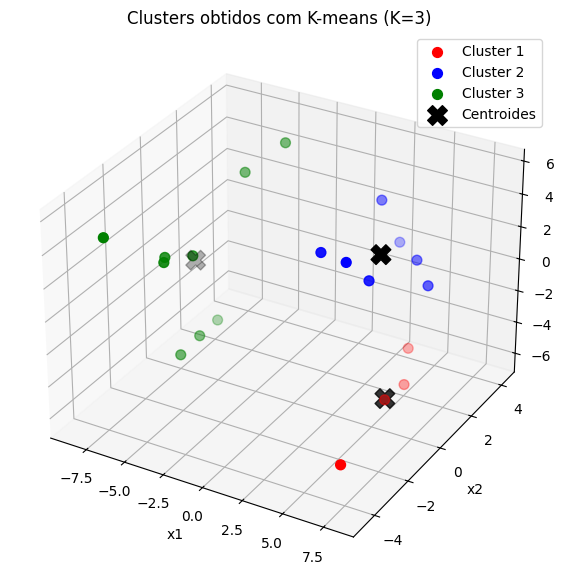

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotagem dos clusters em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Cores para cada cluster
cores = ['red', 'blue', 'green']
for i in range(3):
    pontos = df[rotulos == i]
    ax.scatter(pontos['x1'], pontos['x2'], pontos['x3'],
               c=cores[i], label=f'Cluster {i+1}', s=50)

# Plotando os centroides
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2],
           c='black', marker='X', s=200, label='Centroides')

# Títulos e rótulos
ax.set_title("Clusters obtidos com K-means (K=3)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.legend()
plt.show()


### c) Inicialização com outros centros fixos:

Repita o item (a), considerando agora os centros iniciais:

- \( m_1 = (-0.1, 0, -0.1)^T \)
- \( m_2 = (0, -2, -3)^T \)
- \( m_3 = (1, -3, -5)^T \)

Compare os resultados obtidos com o item (a) e explique as razões das diferenças, **incluindo o número de iterações** necessárias para alcançar a convergência.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Dados
dados = [
    [7.82, -4.58, -3.97],
    [-6.68, 3.16, 2.71],
    [4.36, 2.19, 2.09],
    [6.72, 0.88, 2.80],
    [-8.64, -3.06, 3.50],
    [-6.87, 0.57, -5.45],
    [4.47, -2.62, 5.76],
    [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33],
    [-6.91, -0.49, -5.68],
    [6.18, -2.81, 5.82],
    [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56],
    [-6.94, -1.22, 1.13],
    [8.09, 0.20, 2.25],
    [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04],
    [-6.38, -1.74, 1.43],
    [4.08, 1.30, 5.33],
    [6.27, 0.93, -2.78]
]

df = pd.DataFrame(dados, columns=["x1", "x2", "x3"])

# Centros iniciais definidos para o item (c)
centros_c = np.array([
    [-0.1, 0.0, -0.1],
    [0.0, -2.0, -3.0],
    [1.0, -3.0, -5.0]
])

# KMeans com esses centros
kmeans_c = KMeans(n_clusters=3, init=centros_c, n_init=1, random_state=42)
kmeans_c.fit(df)

# Resultados
centroides_c = kmeans_c.cluster_centers_

for i, centro in enumerate(centroides_c):
    print(f"Centroide {i+1}: x1 = {centro[0]:.2f}, x2 = {centro[1]:.2f}, x3 = {centro[2]:.2f}")

# Número de iterações
print(f"\nNúmero de iterações até convergência: {kmeans_c.n_iter_}")


Centroide 1: x1 = 5.80, x2 = -0.41, x3 = 4.03
Centroide 2: x1 = -6.84, x2 = 0.39, x3 = -0.45
Centroide 3: x1 = 6.90, x2 = -1.10, x3 = -3.73

Número de iterações até convergência: 6


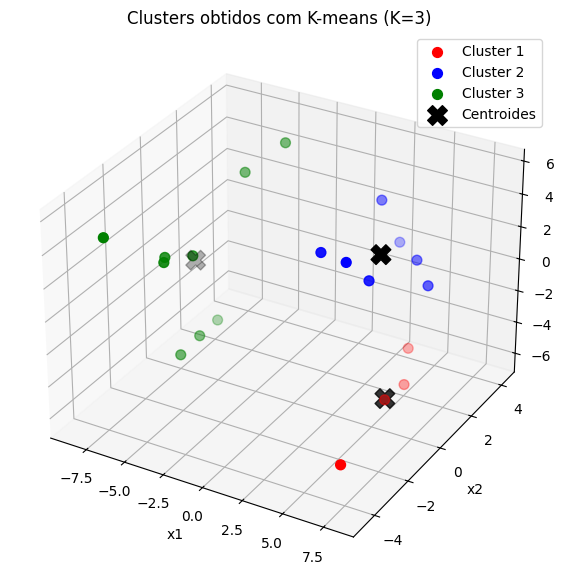

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotagem dos clusters em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Cores para cada cluster
cores = ['red', 'blue', 'green']
for i in range(3):
    pontos = df[rotulos == i]
    ax.scatter(pontos['x1'], pontos['x2'], pontos['x3'],
               c=cores[i], label=f'Cluster {i+1}', s=50)

# Plotando os centroides
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2],
           c='black', marker='X', s=200, label='Centroides')

# Títulos e rótulos
ax.set_title("Clusters obtidos com K-means (K=3)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.legend()
plt.show()
